# Introduction

In [1]:
"""
What? Logistic regression in breast cancer dataset
"""

"\nWhat? Logistic regression in breast cancer dataset\n\nhttps://github.com/amueller/introduction_to_ml_with_python\nGuido, Sarah, and Andreas Müller. Introduction to machine learning with python. Vol. 282. O'Reilly Media, 2016.\n"

# Import modules

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 5
rcParams['font.size'] = 20
# Getting rid of the warning messages
import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


In [4]:
"""
The default value of C=1 provides quite good performance, with 95% accuracy on both the training and the test set. 
But as training and test set performance are very close, it is likely that we are UNDERFITTING.
"""

'\nThe default value of C=1 provides quite good performance, with 95% accuracy on both the training and the test set. \nBut as training and test set performance are very close, it is likely that we are UNDERFITTING.\n'

In [5]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.951


In [6]:
"""
Using C=100 results in higher training set accuracy, and also a slightly increased test set accuracy, confirming 
our intuition that a more complex model should perform better.
"""

'\nUsing C=100 results in higher training set accuracy, and also a slightly increased test set accuracy, confirming \nour intuition that a more complex model should perform better.\n'

In [7]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


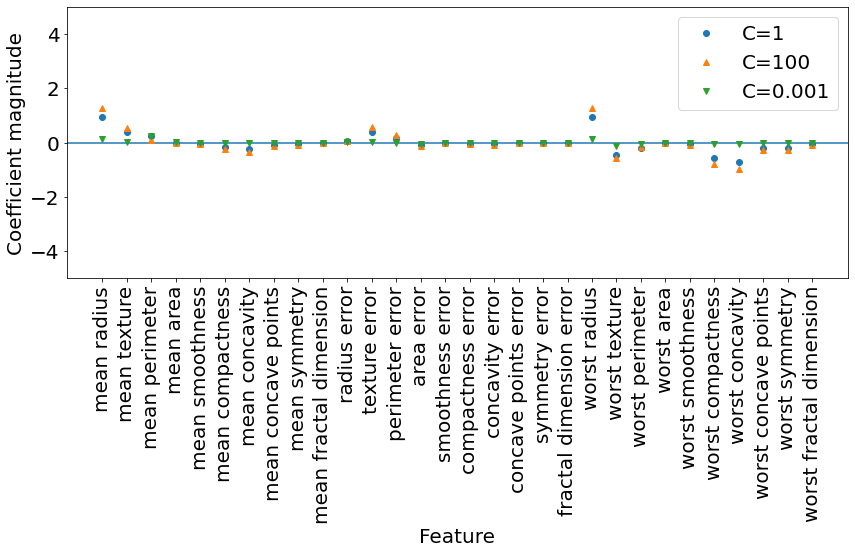

In [8]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

## Attention

In [9]:
"""
If the coefficient magnitudes cahnges SIGN you need to pay attention on how to interprete the model.
Interpreting a model like this, one might think the coefficient tells us which class a feature is associated with. 
For example, one might think that a high “texture error” feature is related to a sample being “malignant.” However, 
the change of sign in a coefficient means that depending on which model we look at, a high value could be taken 
as being either indicative of “benign” or indicative of “malignant.” This illustrates that interpretations of 
coefficients of linear models should always be taken with a grain of salt.
"""

'\nIf the coefficient magnitudes cahnges SIGN you need to pay attention on how to interprete the model.\nInterpreting a model like this, one might think the coefficient tells us which class a feature is associated with. \nFor example, one might think that a high “texture error” feature is related to a sample being “malignant.” However, \nthe change of sign in a coefficient means that depending on which model we look at, a high value could be taken \nas being either indicative of “benign” or indicative of “malignant.” This illustrates that interpretations of \ncoefficients of linear models should always be taken with a grain of salt.\n'

## A possible solution

In [10]:
"""
If we desire a more interpretable model, using L1 regularization might help, as it limits the model to using only 
a few features. Here we used L2 instead just because L1 is no longer supported in logistic regression.
"""

'\nIf we desire a more interpretable model, using L1 regularization might help, as it limits the model to using only \na few features. Here we used L2 instead just because L1 is no longer supported in logistic regression.\n'

Training accuracy of l1 logreg with C=0.001: 0.95
Test accuracy of l1 logreg with C=0.001: 0.93
Training accuracy of l1 logreg with C=1.000: 0.95
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.94
Test accuracy of l1 logreg with C=100.000: 0.95


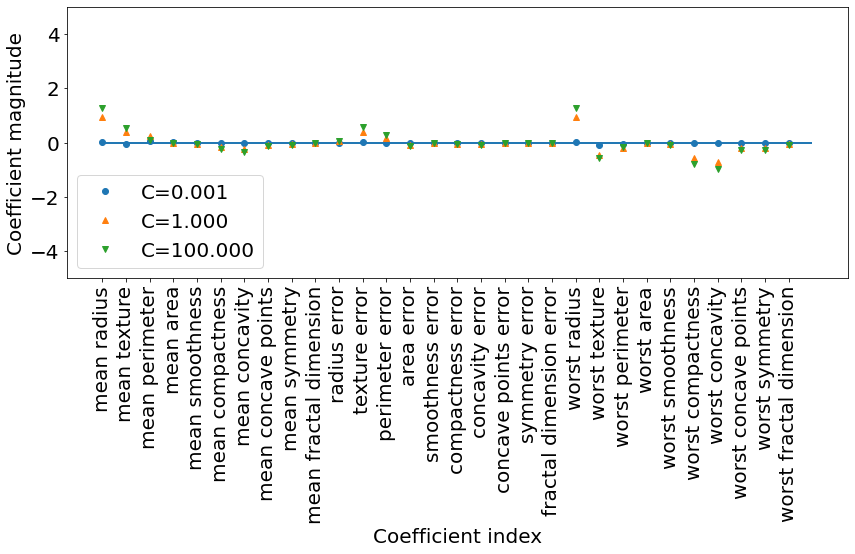

In [11]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l2").fit(X_train, y_train) 
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
              C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    plt.hlines(0, 0, cancer.data.shape[1])
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5, 5)
    plt.legend(loc=3)

# References
<hr style = "border:2px solid black" ></hr>


- https://github.com/amueller/introduction_to_ml_with_python
- Guido, Sarah, and Andreas Müller. Introduction to machine learning with python. Vol. 282. O'Reilly Media, 2016.

